<a href="https://colab.research.google.com/github/tranduynhan02/ML_2022-2023/blob/main/Lab_7_20130346_TranDuyNhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Mount Drive

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Study/MachineLearning/lab7'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Study/MachineLearning/lab7


# Import libraries

In [5]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from prettytable import PrettyTable

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [7]:
#code
dts = datasets.load_iris()
X = dts.data
y = dts.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
clf = svm.SVC()
clf.fit(X_train,y_train)
y_predsvm = clf.predict(X_test)

t = PrettyTable(["Regression","accuracy","precision","recall","f1"])
t.add_row(["SVM",round(metrics.accuracy_score(y_test,y_predsvm),4),
           round(metrics.precision_score(y_test,y_predsvm,average='macro'),4),
           round(metrics.recall_score(y_test,y_predsvm,average='macro'),4),
           round(metrics.f1_score(y_test,y_predsvm,average='macro'),4)])
print(t)

+------------+----------+-----------+--------+--------+
| Regression | accuracy | precision | recall |   f1   |
+------------+----------+-----------+--------+--------+
|    SVM     |  0.8889  |   0.8958  | 0.9074 | 0.8845 |
+------------+----------+-----------+--------+--------+


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
# code
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)
y_predrdf = rdf.predict(X_test)

t = PrettyTable(["Regression","accuracy","precision","recall","f1"])
t.add_row(["Random Forest",round(metrics.accuracy_score(y_test,y_predrdf),4),
           round(metrics.precision_score(y_test,y_predrdf,average='macro'),4),
           round(metrics.recall_score(y_test,y_predrdf,average='macro'),4),
           round(metrics.f1_score(y_test,y_predrdf,average='macro'),4)])
print(t)

+---------------+----------+-----------+--------+--------+
|   Regression  | accuracy | precision | recall |   f1   |
+---------------+----------+-----------+--------+--------+
| Random Forest |  0.9333  |   0.9412  | 0.9375 | 0.9333 |
+---------------+----------+-----------+--------+--------+


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

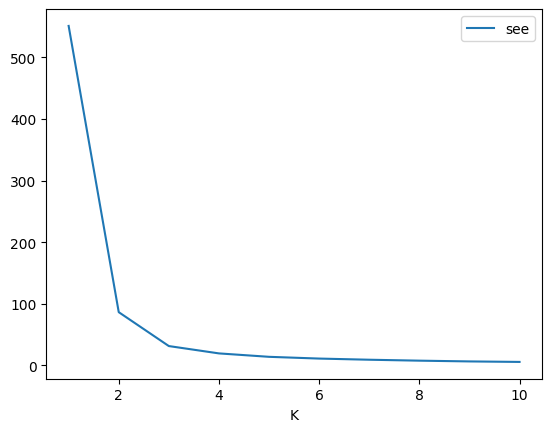

In [9]:
data_mnist = datasets.load_digits()
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
kmeans = KMeans(n_clusters = 10, n_init = 12, random_state = 0)
kmeans.fit(data_mnist.data)
clusters = kmeans.predict(data_mnist.data)
kmeans.cluster_centers_.shape
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init = 12, random_state = 0)
  kmeans.fit(X_kbest)
  sse.append(kmeans.inertia_)

k_range = range(1, 11)
plt.xlabel('K')
plt.plot(k_range, sse, label='see')
plt.legend()
plt.show()

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
y_predkNN = rdf.predict(X_test)

gauNB = GaussianNB()
gauNB.fit(X_train,y_train)
y_predgauNB = gauNB.predict(X_test)

t = PrettyTable(["Regression","accuracy","precision","recall","f1"])
t.add_row(["kNN",round(metrics.accuracy_score(y_test,y_predkNN),4),
           round(metrics.precision_score(y_test,y_predkNN,average='macro'),4),
           round(metrics.recall_score(y_test,y_predkNN,average='macro'),4),
           round(metrics.f1_score(y_test,y_predkNN,average='macro'),4)])
t.add_row(["Naive Bayes: Gaussian",round(metrics.accuracy_score(y_test,y_predgauNB),4),
           round(metrics.precision_score(y_test,y_predgauNB,average='macro'),4),
           round(metrics.recall_score(y_test,y_predgauNB,average='macro'),4),
           round(metrics.f1_score(y_test,y_predgauNB,average='macro'),4)])
print(t)

+-----------------------+----------+-----------+--------+--------+
|       Regression      | accuracy | precision | recall |   f1   |
+-----------------------+----------+-----------+--------+--------+
|          kNN          |  0.9778  |   0.9825  | 0.9722 | 0.9765 |
| Naive Bayes: Gaussian |  0.9333  |   0.9291  | 0.9352 | 0.9314 |
+-----------------------+----------+-----------+--------+--------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [10]:
#code
print('KNN is the better approach for this problem. Supervised learning')

KNN is the better approach for this problem. Supervised learning


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





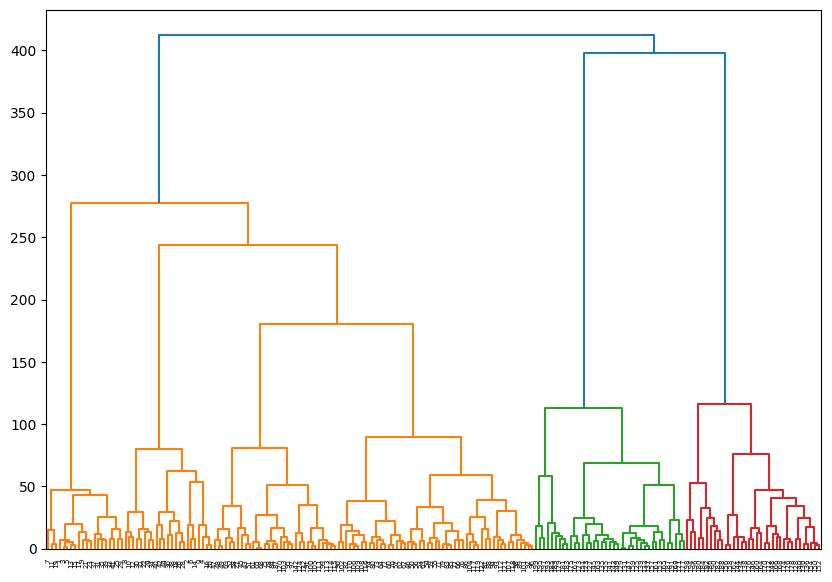

In [14]:
#code
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('shopping-data.csv')

# Drop categorical attributes
df = df.drop(['CustomerID', 'Genre'], axis=1)

# Create dendrograms
linked = linkage(df, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

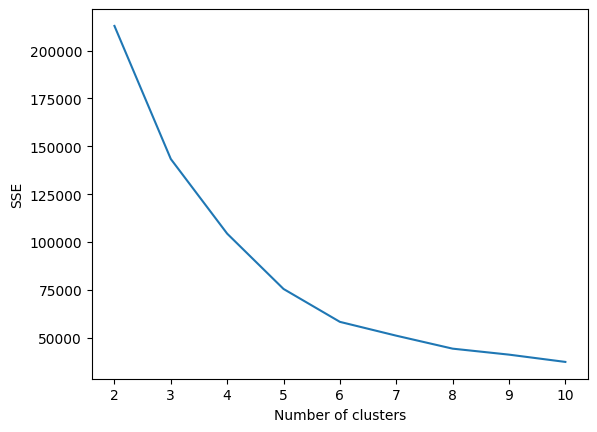

In [15]:
# Compute SSE values for k in [2, 10]
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=12)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot SSE values
plt.plot(range(2, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
     

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

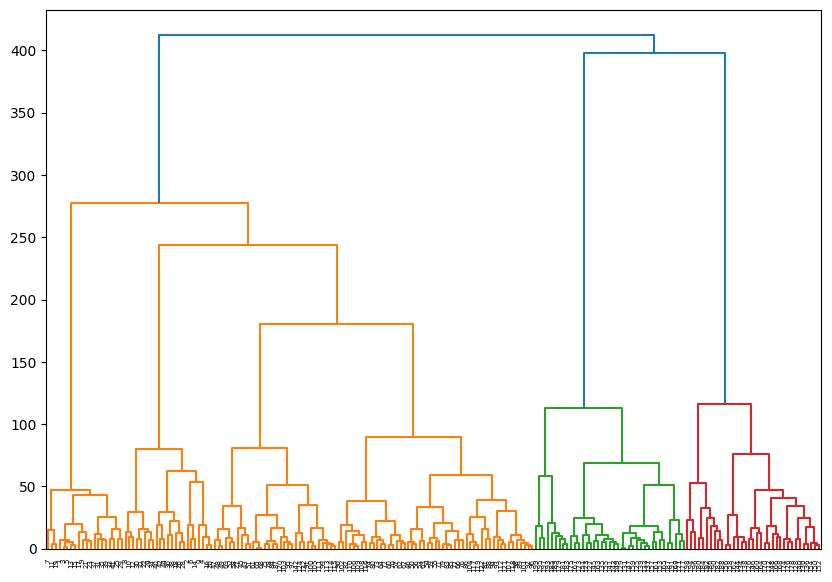

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create dendrograms
linked = linkage(df, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

# Choose an appropriate number of clusters
n_clusters = 5

# Apply AgglomerativeClustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(df)
labels = agg_clustering.labels_
print(labels)

#Finally,
Save a copy in your Github. Remember renaming the notebook.